<a href="https://colab.research.google.com/github/sambitdash/EVA2-public/blob/master/Session-7/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-04 15:07:14.903193


In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 15:07:18.124840


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 1s 0us/step
2019-09-04 15:07:24.932358


(60000, 28, 28)
2019-09-04 15:07:30.919130


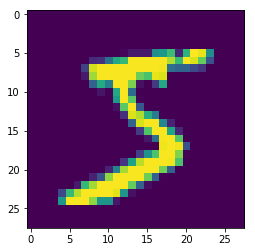

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 15:07:37.340181


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 15:07:42.226183


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 15:07:44.943479


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 15:07:47.667222


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 15:07:53.549415


In [27]:
## MAIN BLOCK

from keras.layers import Activation, Input, Concatenate, add
from keras.models import Model
x1 = Input(shape=(28, 28, 1))
x2 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x1)
x12 = add([x1, x2])
x3 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x12)
x123 = add([x12, x3])
x4 = MaxPooling2D()(x123)
x5 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x4)
x45 = add([x4, x5])
x6 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x45)
x456 = add([x45, x6])
x7 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x456)
x567 = add([x5, x6, x7])
x8 = MaxPooling2D()(x567)
x9 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x8)
x89 = add([x8, x9])
x10 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x89)
x890 = add([x89, x10])
x11 = Convolution2D(32, (3, 3), padding='same', activation='relu')(x890)
x12 = Convolution2D(10, (7, 7))(x11)
x13 = Activation('softmax')(Flatten()(x12))

model = Model(inputs=x1, outputs=x13)
print(datetime.datetime.now())

2019-09-04 15:31:41.813722


In [28]:
model.summary()

print(datetime.datetime.now())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 28, 28, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
add_33 (Add)                    (None, 28, 28, 32)   0           input_8[0][0]                    
                                                                 conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 28, 28, 32)   9248        add_33[0][0]               

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-09-04 15:31:55.851666


In [30]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0904 15:31:59.672882 140469759735680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 15:31:59.837243 140469759735680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.1514 - acc: 0.9534
Epoch 2/10
60000/60000 [==============================] - 31s 522us/step - loss: 0.0553 - acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0445 - acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0361 - acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 31s 521us/step - loss: 0.0318 - acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0294 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0268 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0232 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.0228 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 31s 518us/step - loss: 

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 15:37:31.278874


In [32]:
print(score)
print(datetime.datetime.now())

[0.04137275253992338, 0.9887]
2019-09-04 15:37:39.433980
